# Add src dir to PYTHONPATH

In [3]:
import sys
import os

# Add src dir to PYTHONPATH
src_path = os.path.join(os.getcwd(), "../src")
if src_path not in sys.path:
    sys.path.append(src_path)


# Testing of Face Detection

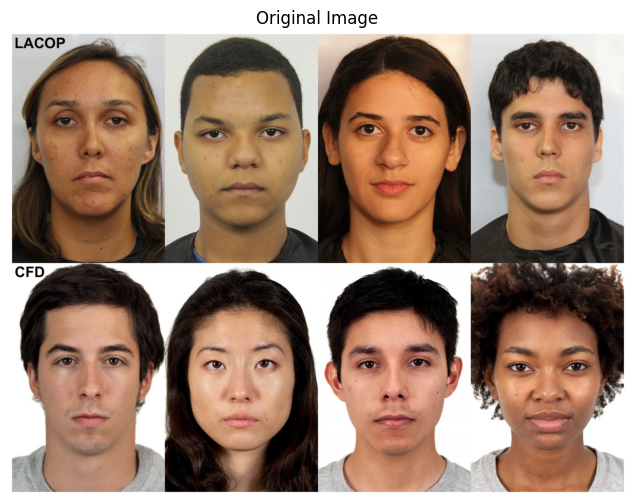

In [4]:
import cv2
import matplotlib.pyplot as plt
from utils import draw_faces, blur_faces
from haar_cascade import detect_faces, process_video

data_path = "../data/raw/"
image_file = os.path.join(data_path, "test.jpg")  # Sostituire con un'immagine reale

# Carica l'immagine
image = cv2.imread(image_file)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualizza l'immagine
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Detect Faces

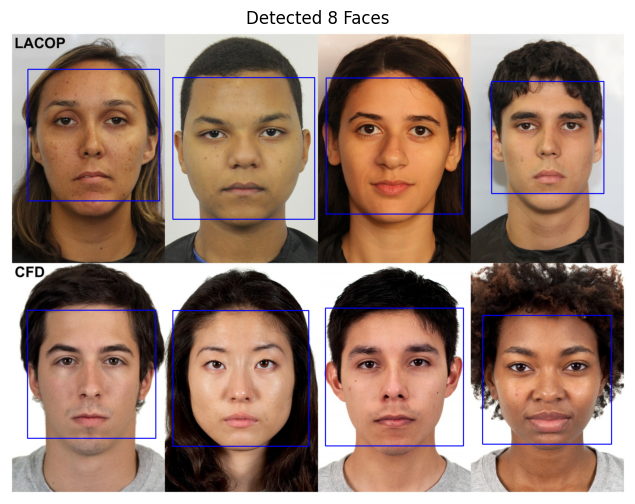

In [5]:
# Detect faces in the image
detected_faces = detect_faces(image)

# Draw rectangles around faces
image_with_faces = draw_faces(image_rgb, detected_faces)


plt.figure(figsize=(8, 6))
plt.imshow(image_with_faces)
plt.title(f"Detected {len(detected_faces)} Faces")
plt.axis("off")
plt.show()

# Blur faces

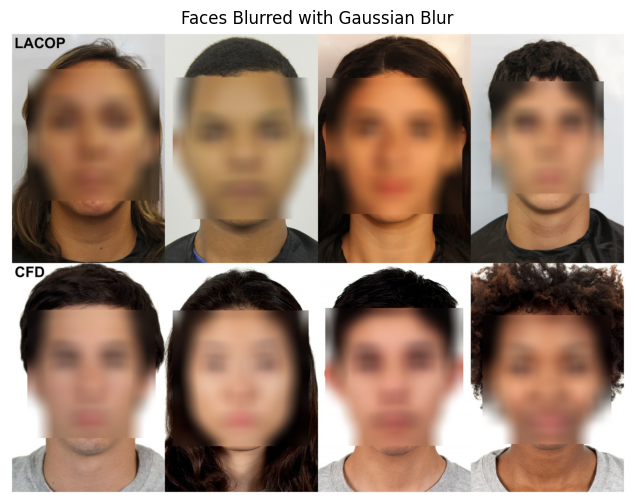

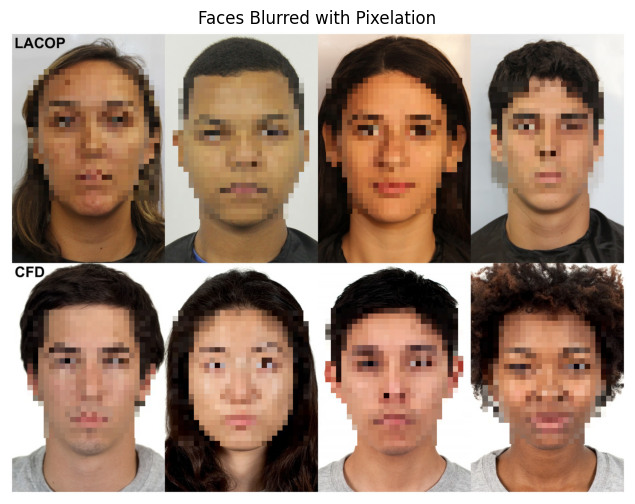

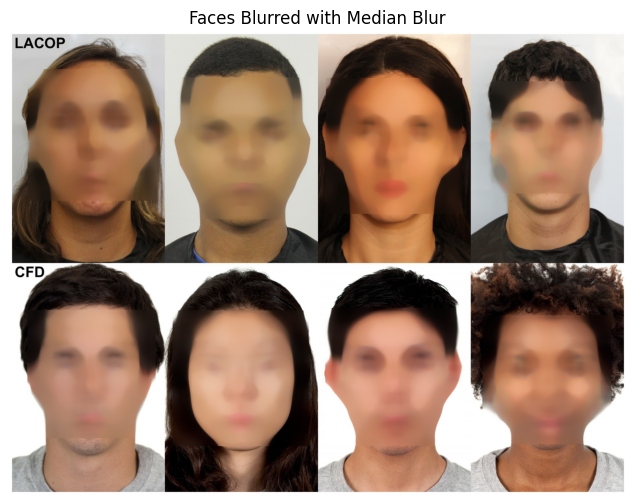

In [6]:
# Blur faces in the image
blurred_image = blur_faces(image_rgb, detected_faces)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image)
plt.title("Faces Blurred with Gaussian Blur")
plt.axis("off")
plt.show()

# Blur faces in the image using pixelation
blurred_image_pixelation = blur_faces(image_rgb, detected_faces, "pixelation")

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_pixelation)
plt.title("Faces Blurred with Pixelation")
plt.axis("off")
plt.show()

# Blur faces in the image using median blur
blurred_image_median = blur_faces(image_rgb, detected_faces, "median")

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_median)
plt.title("Faces Blurred with Median Blur")
plt.axis("off")
plt.show()

# Testing on Video

In [ ]:
# Path to the input video
input_video_path = "../data/raw/test.mp4"   
output_video_gaussian = "../data/processed/gaussian_video.avi"
output_video_pixelation = "../data/processed/pixelated_video.avi"
output_video_median = "../data/processed/median_video.avi"
haar_cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

# Process the video
process_video(input_video_path, output_video_gaussian, haar_cascade_path, blur_method="gaussian")
process_video(input_video_path, output_video_pixelation, haar_cascade_path, blur_method="pixelation")
process_video(input_video_path, output_video_median, haar_cascade_path, blur_method="median")

# Using YOLOv3

First, download the models using the Python module `get_yolo_models.py`. Ensure that the files `YOLO_Face.h5` and 

`yolov3-wider_16000.weights` are present in the `src/model-weights` folder.

In [8]:
from yolo import load_yolo_model, detect_faces_yolo

# Path to the YOLOv3 model
cfg_path = "../src/model-weights/yolov3-face.cfg"
weights_path = "../src/model-weights/yolov3-wider_16000.weights"
names_path = "../src/model-weights/wider_face.names"

## Load the image

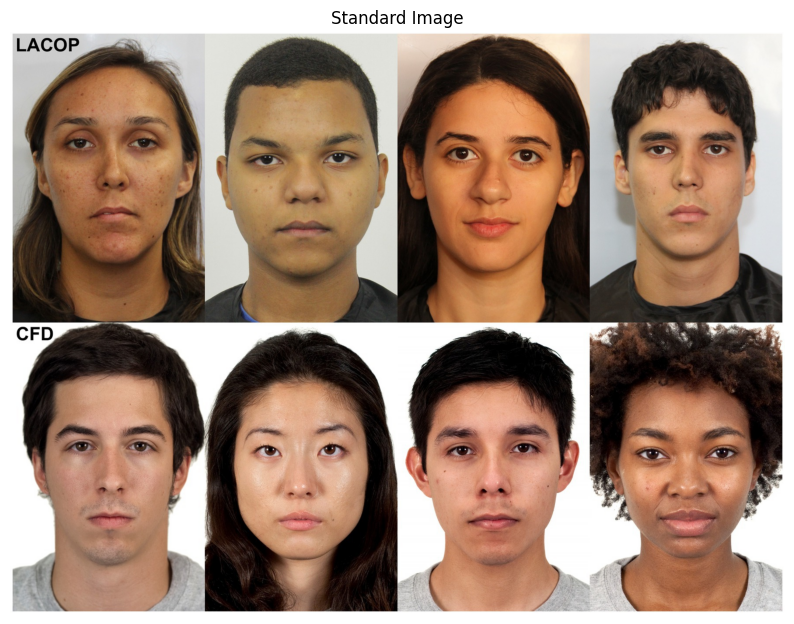

In [9]:
# Load the image
data_path = "../data/raw/"
image_file = os.path.join(data_path, "test.jpg") 
yolo_image = cv2.imread(image_file)

# Show the image with detected faces
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Standard Image")
plt.show()

## Use YOLOv3 for face detection

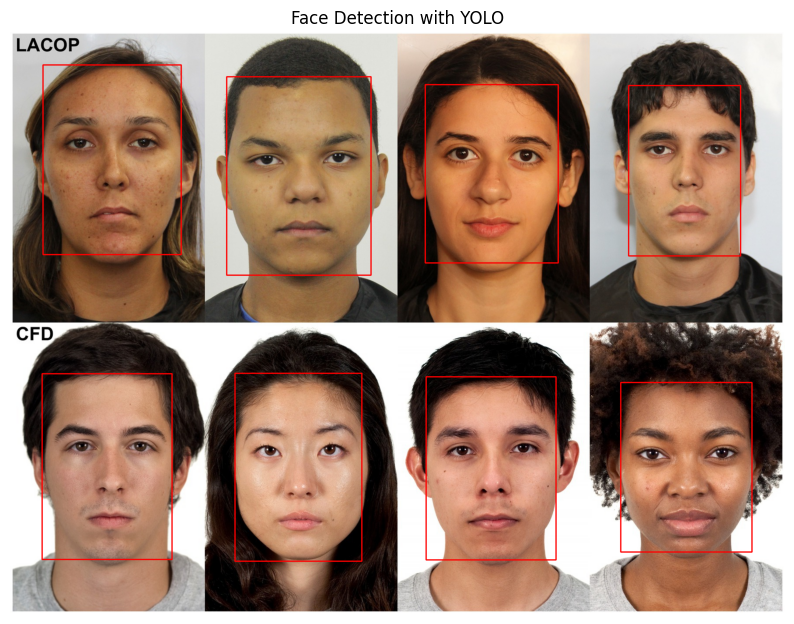

In [10]:
yolo_net, yolo_classes = load_yolo_model(cfg_path, weights_path, names_path)
output_layers = yolo_net.getUnconnectedOutLayersNames()

# Detect faces in the image using YOLO
detected_faces = detect_faces_yolo(yolo_image, yolo_net, output_layers)

image_faces = yolo_image.copy()

# Draw rectangles around the detected faces
for (x, y, w, h) in detected_faces:
    cv2.rectangle(image_faces, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Show the image with detected faces
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_faces, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Face Detection with YOLO")
plt.show()

## Apply blurring effects

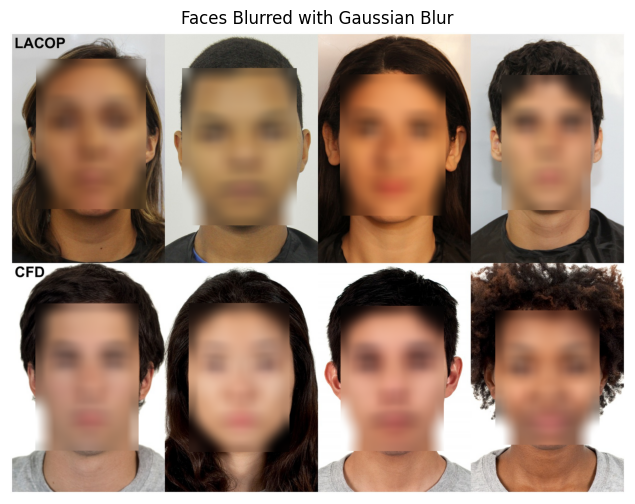

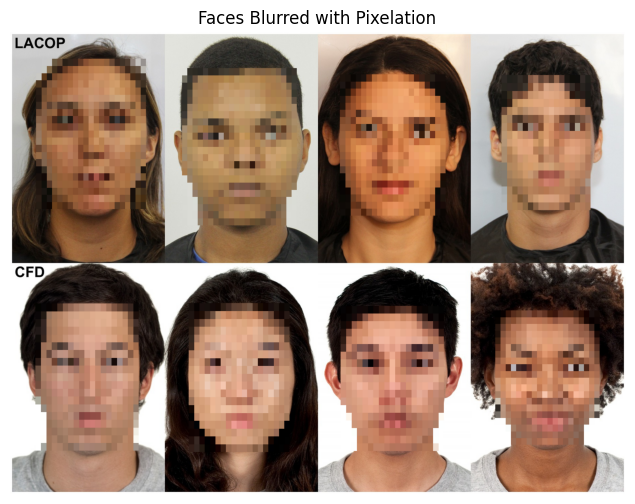

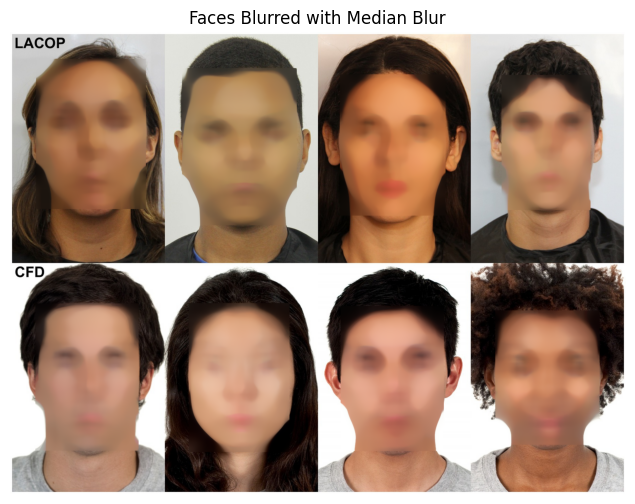

In [11]:
# Blur faces in the image
blurred_image = blur_faces(yolo_image, detected_faces)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Faces Blurred with Gaussian Blur")
plt.axis("off")
plt.show()

# Blur faces in the image using pixelation
blurred_image_pixelation = blur_faces(yolo_image, detected_faces, "pixelation")

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image_pixelation, cv2.COLOR_BGR2RGB))
plt.title("Faces Blurred with Pixelation")
plt.axis("off")
plt.show()

# Blur faces in the image using median blur
blurred_image_median = blur_faces(yolo_image, detected_faces, "median")

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred_image_median, cv2.COLOR_BGR2RGB))
plt.title("Faces Blurred with Median Blur")
plt.axis("off")
plt.show()

## Testing on Video

In [ ]:
from yolo import process_video_yolo

# Path to the input video
input_video_path = "../data/raw/test.mp4"   
output_video_gaussian = "../data/processed/yolo_gaussian_video.avi"
output_video_pixelation = "../data/processed/yolo_pixelated_video.avi"
output_video_median = "../data/processed/yolo_median_video.avi"

# Process the video
process_video_yolo(input_video_path, output_video_gaussian, cfg_path, weights_path, names_path, "gaussian")
process_video_yolo(input_video_path, output_video_pixelation, cfg_path, weights_path, names_path, "pixelation")
process_video_yolo(input_video_path, output_video_median, cfg_path, weights_path, names_path, "median")